In [3]:
import math
from matplotlib import pyplot as plt
from dataclasses import dataclass
from typing import List
from random import randint, random, uniform

In [4]:
#x - время в секундах
#шаг функции по времени = 1/30 секунды

def get_function_plot(A, phi, x_start, x_end):
    result = []
    x_axis = []
    x_val = x_start
    dt = 1/30
    while x_val<x_end:
        y_val = A*math.sin(phi*3.141592*x_val)
        result.append(y_val)
        x_axis.append(x_val)
        x_val+=dt
    return result,x_axis

def get_difference_plot(func_cell,func_mako):
    result_plus = []
    result_minus = []
    for i, cell_val in enumerate(func_cell):
        mako_val = func_mako[i]

        if mako_val*cell_val < 0:
            result_plus.append(0)
            result_minus.append(mako_val)
        else:
            if abs(cell_val)>=abs(mako_val):
                result_plus.append(mako_val)
                result_minus.append(0)
            else:
                result_plus.append(cell_val)
                result_minus.append(mako_val-cell_val)

    return result_plus,result_minus

def get_abs_integral(func):
    result = 0
    for x in func:
        result+=abs(x)
    return result

In [39]:
@dataclass
class OscillationParams:
    A: float
    phi: float
    x_from: float
    x_to: float

def get_function_value(x_val, osc_param:OscillationParams):
    return osc_param.A*math.sin(osc_param.phi*3.1415*x_val)

def generate_function(params: List[OscillationParams]):
    sorted_params = sorted(params, key= lambda p: p.x_from)
    x_start = sorted_params[0].x_from
    x_end = sorted_params[-1].x_to

    y_axis = []
    x_axis = []

    x_val = x_start
    param_pointer = 0
    dx = 0.02
    while x_val<x_end:
        y_val = get_function_value(x_val, sorted_params[param_pointer])
        x_axis.append(x_val)
        y_axis.append(y_val)

        x_val+=dx
        if x_val>sorted_params[param_pointer].x_to:
            param_pointer+=1


    return y_axis,x_axis


class AxisState:

    def __init__(self):
        self.current_value = 7
        max_axis_value = 20
        min_A = 0.5
        max_A = 2
        min_phi = 0.1
        max_phi = 4
        self.params: List[OscillationParams] = []
        checkpoints = [10, 15, 20]

        print(checkpoints)
        last_point = 0
        for checkpoint in checkpoints:
            A = 1  #round(min_A+(max_A-min_A)*random(),1)
            phi = 1  #round(min_phi+(max_phi-min_phi)*random(),1)
            osc_param_unit = OscillationParams(A, phi, last_point, checkpoint)
            self.params.append(osc_param_unit)
            last_point = checkpoint

        self.params.append(OscillationParams(0, 0, 20, 30))

    def plot_freqs(self):
        y_axis_cell, x_axis_cell = generate_function(self.params)
        plt.figure(figsize=(14, 4))
        plt.plot(x_axis_cell, y_axis_cell)

    def get_current_paramset(self, value, params: List[OscillationParams]):
        for paramset in params:
            if paramset.x_from <= value < paramset.x_to:
                return paramset
        return None

    def get_checkpoints(self):
        a = 10  # Начало отрезка
        b = 20.0  # Конец отрезка
        n = 3  # Количество чисел

        # Вычисляем длину каждого интервала
        total_length = b - a
        interval_length = total_length / n

        # Генерируем числа в каждом интервале
        random_numbers = [
            uniform(a + i * interval_length, a + (i + 1) * interval_length)
            for i in range(n)
        ]

        return random_numbers

    def get_mako_additions(self, cell_val, mako_val):
        result_plus = 0
        result_minus = 0
        if mako_val * cell_val < 0:
            result_plus = 0
            result_minus = mako_val
        else:
            if abs(cell_val) >= abs(mako_val):
                result_plus = mako_val
                result_minus = 0
            else:
                result_plus = cell_val
                result_minus = mako_val - cell_val
        return result_plus, result_minus

    def apply_mako_emision(self, mako_params: List[OscillationParams]):
        dt = 0.01
        if len(mako_params) < 1: return
        t_end = mako_params[-1].x_to

        t_current = 0

        mako_plus = 0
        mako_minus = 0

        x_plot = []
        m_plot = []
        c_plot = []

        add_mako_evol = 0

        while t_current < t_end:
            cell_paramset = self.get_current_paramset(self.current_value,
                                                      self.params)
            y_cell = get_function_value(t_current, cell_paramset)*dt

            mako_paramset = self.get_current_paramset(t_current, mako_params)
            y_mako = get_function_value(t_current, mako_paramset)*dt

            x_plot.append(t_current)
            m_plot.append(y_mako)
            c_plot.append(y_cell)
                          

            result_plus, result_minus = self.get_mako_additions(y_cell, y_mako)

            mako_plus += abs(result_plus)
            mako_minus += abs(result_minus)

            add_mako_evol += abs(result_plus)
            if add_mako_evol > 10:
                self.current_value += 1
                add_mako_evol = add_mako_evol % 10

            t_current += dt

            

        print("mako+:", mako_plus)
        print("mako-:", mako_minus)
        print("new value:", self.current_value)
        print("x_plot",x_plot)
        print("c_plot",c_plot)
        print("m_plot",m_plot)

        plt.figure(figsize=(7, 4))
        plt.plot(x_plot,c_plot)
        plt.plot(x_plot,m_plot)

        self.current_value = 7

[10, 15, 20]
[OscillationParams(A=1, phi=1, x_from=0, x_to=10), OscillationParams(A=1, phi=1, x_from=10, x_to=15), OscillationParams(A=1, phi=1, x_from=15, x_to=20), OscillationParams(A=0, phi=0, x_from=20, x_to=30)]
mako+: 1.273172370341756
mako-: 0
new value: 7
x_plot [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002

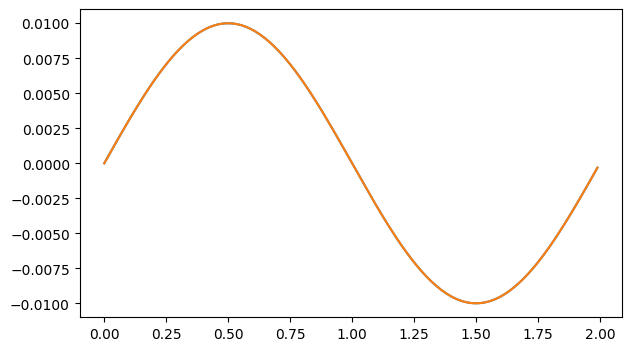

In [40]:
ax_state = AxisState()
print(ax_state.params)
#mako_params = [OscillationParams(1.5, 3.4, 0, 4), OscillationParams(1.5, 1.1, 4, 5)]
mako_params = [OscillationParams(A=1, phi=1, x_from=0, x_to=2)]
ax_state.apply_mako_emision(mako_params)

mako+: 1262.7881573729567
mako-: 0.0
new value: 19


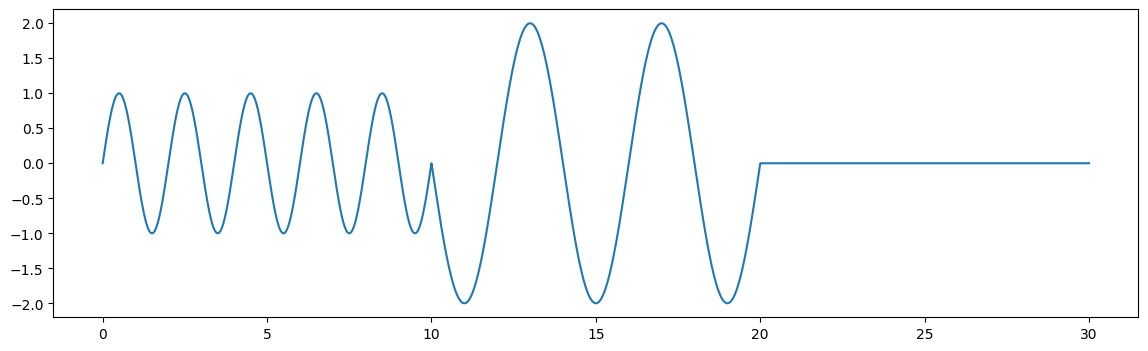

In [103]:

actual_params = [OscillationParams(2, 0.5, 10, 20), OscillationParams(1, 1, 0, 10), OscillationParams(0, 0, 20, 30)]
y_axis_cell,x_axis_cell = generate_function(actual_params)
plt.figure(figsize=(14, 4))
plt.plot(x_axis_cell,y_axis_cell)

mako+: 71.79481858399872
mako-: 119.17545280993708


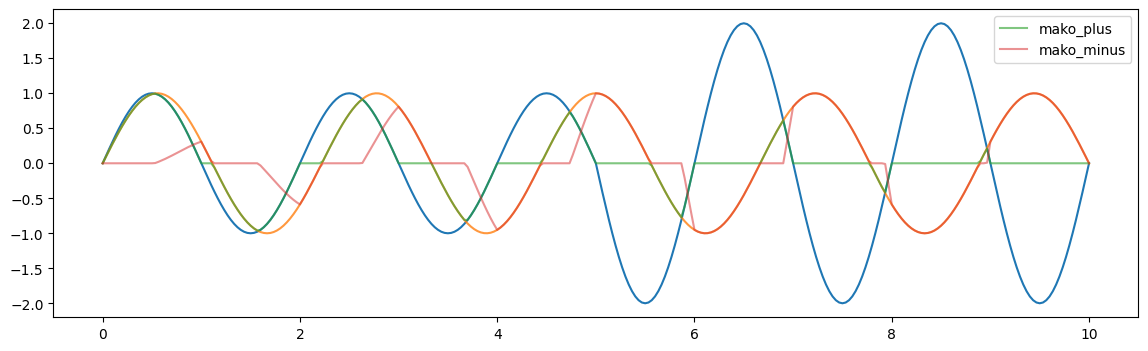

In [ ]:

plt.plot(x_axis,func_a)
plt.plot(xb_axis,func_b, alpha = 0.8)
plt.plot(x_axis,result_plus, alpha = 0.6, label = 'mako_plus')
plt.plot(x_axis,result_minus, alpha = 0.5, label = 'mako_minus')
plt.legend()
print("mako+:", get_abs_integral(result_plus))
print("mako-:", get_abs_integral(result_minus))